# Happiness Report 2021 Analysis
The World Happiness Report è uno dei più importanti sondaggi riguardanti la felicità globale. Pubblicato annualmente dalle Nazioni Unite, classifica i vari stati in base a quanto i cittadini di quest'ultimi si percepiscano felici. Questa analisi esplora l'edizione del 2021 del report, che ci fornisce vari dati per ogni paese nel globo.
Fonte dei dati: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021.

## Come sono stati raccolti i dati?

Il World Happiness Report raccoglie dati sulla felicità e il benessere attraverso una combinazione di sondaggi e dati da varie fonti. I metodi per la raccolta dati sono i seguenti:
- **Gallup World Poll:** Gallup, istituto basato negli Stati Uniti che si occupa di ricerca statistica e di analisi dell'opinione pubblica, conduce numerosi sondaggi in numerosi paesi in tutto il mondo, nei quali sottopone individui a domande riguardanti la loro soddisfazione nella vita. Queste valutazioni sono poi usate per calcolare un "life satisfaction core", ovvero un punteggio di soddisfazione della vita. Questi sondaggi utilizzano la scala di Cantril, ovvero domande che utilizzano una scaletta che va da 1 a 10 dove 1 è il valore peggiore, e 10 è quello più alto.
- **Dati Oggettivi:** il report include inoltre variabili che contribuiscono al benessere, come il PIL pro capite di un paese, la rete di welfare, l'aspettativa di vita, e la libertà di fare scelte dei singoli cittadini.
- **Altri sondaggi:**  il World Happiness Report include inoltre dati che provengono da sondaggi nazionali o internazionali, correlati anche questi al benessere e alla felicità.

In questa analisi, ci concentreremo maggiormente sui **Dati Oggettivi**, per effettuare un'analisi obiettiva del nostro dataframe.

**Il report dà più peso all'opinione dei cittadini rispetto che ai Dati Oggettivi, per cui vorremmo verificare se i Dati Obiettivi, presi nella loro singolarità, possono effettivamente rispecchiare in parte il sentimento dei corrispettivi cittadini.**

Fonte per i metodi di data collection: https://worldhappiness.report/about/

## Obiettivi dell'analisi
Con quest'analisi vorremmo chiarire alcuni punti, tra cui:
- Quali zone del mondo sono più felici e perché?
- La prosperità economica porta sempre un paese ad essere felice?
- Quali sono i pattern che rendono un paese felice?
- Alcune variabili sono interconnesse tra loro?
- Quanto i dati obiettivi influenzano la felicità di un paese?

In [185]:
# Importiamo pandas e altre librerie necessarie all'analisi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
# Leggiamo il file csv con pandas e lo salviamo in una variabile denominata df.
df = pd.read_csv('world-happiness-report-2021.csv')

In [187]:
# Visualizziamo le informazioni del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [188]:
# Visualizziamo le prime 5 entrate del dataframe per avere una visione generale di quest'ultimo
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## Data Cleaning and Preparation

In [189]:
# Controlliamo il dataset per vedere se contiene valori vuoti. Nel nostro caso non ce ne sono.
# Nel caso di valori vuoti, avremmo dovuto scegliere se troncare le colonne di quest'ultimi, o di effettuare delle stime attraverso vari metodi.
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [190]:
# Controlliamo il dataset cercando delle righe duplicate. Non ce ne sono.
df.duplicated().sum()

0

In [191]:
# Controlliamo i tipi di dati per ogni colonna. Non abbiamo bisogno di riformattare nessun dato, ogni colonna è assegnata al tipo giusto di dato.
df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [192]:
# We get rid of the "Explained by" columns which are not relevant for our analysis.
# Iniziamo a rimuovere le colonne che non sono rilevanti per la nostra analisi.
# Rimuoviamo tutte le colonne che contengono "Explained by"
drop_columns = [col for col in df.columns if 'Explained by' in col]
df = df.drop(columns=drop_columns)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


In [193]:
# We get rid of the ladder score in Dystopia column since it's a constant value that serves for comparisons that are not relevant to our analysis
# Tronchiamo la colonna 'LAdder score in Dystopia', è un valore costante che rappresenta il punteggio che un paese dovrebbe avere per essere considerato distopico ('il peggior paese del mondo').
df.drop('Ladder score in Dystopia', axis=1, inplace=True)

In [194]:
# Tronchiamo le colonne upperwhisker and lowerwhisker che servono a fini statistici più dettagliati inutili alla nostra analisi.
df.drop('upperwhisker', axis=1, inplace=True)
df.drop('lowerwhisker', axis=1, inplace=True)

## Correlation Analysis
**Vogliamo capire quanto il PIL pro capite e la qualità di vita impattano la felicità di un paese.**

In [195]:
# Calcoliamo la correlazione tra GDP per capita e il Ladder score, arrotondando il risultato a 2 cifre decimali per una più chiara rappresentazione.
gdp_happiness_correlation = round(df['Logged GDP per capita'].corr(df['Ladder score']), 2)

In [196]:
# The correlation between GDP per capita and the ladder score is 0.79, which indicates a strong positive correlation between GDP per capita and happiness.
# La correlazione tra il GDP per capita e il ladder score è di 0.79 (valore massimo 1), che indica una forte correlazione positiva tra il GDP per capita (PIL pro capite) e la felicità.
gdp_happiness_correlation

0.79

Text(0, 0.5, 'Happiness Score (Ladder Score)')

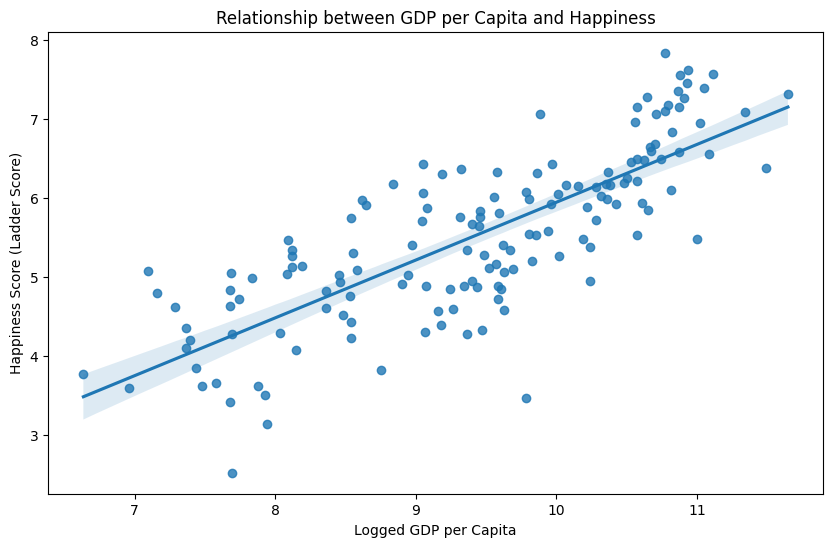

In [197]:
# Creiamo uno scatter plot per visualizzare meglio i nostri dati
plt.figure(figsize=(10, 6))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=df)
plt.title('Relationship between GDP per Capita and Happiness')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score (Ladder Score)')

Come possiamo vedere nel grafico, il PIL pro captie impatta significativamente sulla felicità di un paese. Ora cerchiamo un paese con un PIL pro capite molto basso che sia più felice di qualsiasi paese ricco.

In [198]:
# Calcoliamo i quartili necessari alle analisi
low_gdp_threshold = df['Logged GDP per capita'].quantile(0.25)
high_gpd_threshold = df['Logged GDP per capita'].quantile(0.75)

In [199]:
low_gdp_countries = df[df['Logged GDP per capita'] <= low_gdp_threshold]
high_gdp_countries = df[df['Logged GDP per capita'] >= high_gpd_threshold]

In [200]:
# Cerchiamo il paese più felice ma povero e il paese più triste ma ricco
happiest_low_gdp_country = low_gdp_countries.loc[low_gdp_countries['Ladder score'].idxmax()]
least_happy_high_gdp_country = high_gdp_countries.loc[high_gdp_countries['Ladder score'].idxmin()]

In [201]:
happiest_low_gdp_country

Country name                                              Kyrgyzstan
Regional indicator                Commonwealth of Independent States
Ladder score                                                   5.744
Standard error of ladder score                                 0.046
Logged GDP per capita                                          8.538
Social support                                                 0.893
Healthy life expectancy                                       64.401
Freedom to make life choices                                   0.935
Generosity                                                     0.119
Perceptions of corruption                                      0.908
Dystopia + residual                                            2.648
Name: 66, dtype: object

In [202]:
least_happy_high_gdp_country

Country name                      Hong Kong S.A.R. of China
Regional indicator                                East Asia
Ladder score                                          5.477
Standard error of ladder score                        0.049
Logged GDP per capita                                  11.0
Social support                                        0.836
Healthy life expectancy                               76.82
Freedom to make life choices                          0.717
Generosity                                            0.067
Perceptions of corruption                             0.403
Dystopia + residual                                   1.236
Name: 76, dtype: object

Il Kyrgzstan è più felice di Hong Kong nonostante sia più povero, abbia meno welfare e sia più corrotto. I paesi poveri possono essere comunque più felici di alcuni paesi ricchi.

## Happiness based on regions in the world

In [203]:
# Raggruppiamo i dati basandoci sulle zone del mondo e ordiniamoli per ladder score
regional_happiness = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)

In [204]:
regional_happiness

Regional indicator
North America and ANZ                 7.128500
Western Europe                        6.914905
Central and Eastern Europe            5.984765
Latin America and Caribbean           5.908050
East Asia                             5.810333
Commonwealth of Independent States    5.467000
Southeast Asia                        5.407556
Middle East and North Africa          5.219765
Sub-Saharan Africa                    4.494472
South Asia                            4.441857
Name: Ladder score, dtype: float64

C:\Users\Ezechiele\AppData\Local\Temp\ipykernel_15624\3284889647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_happiness, y=regional_happiness.index, palette='viridis')


Text(0, 0.5, 'Region')

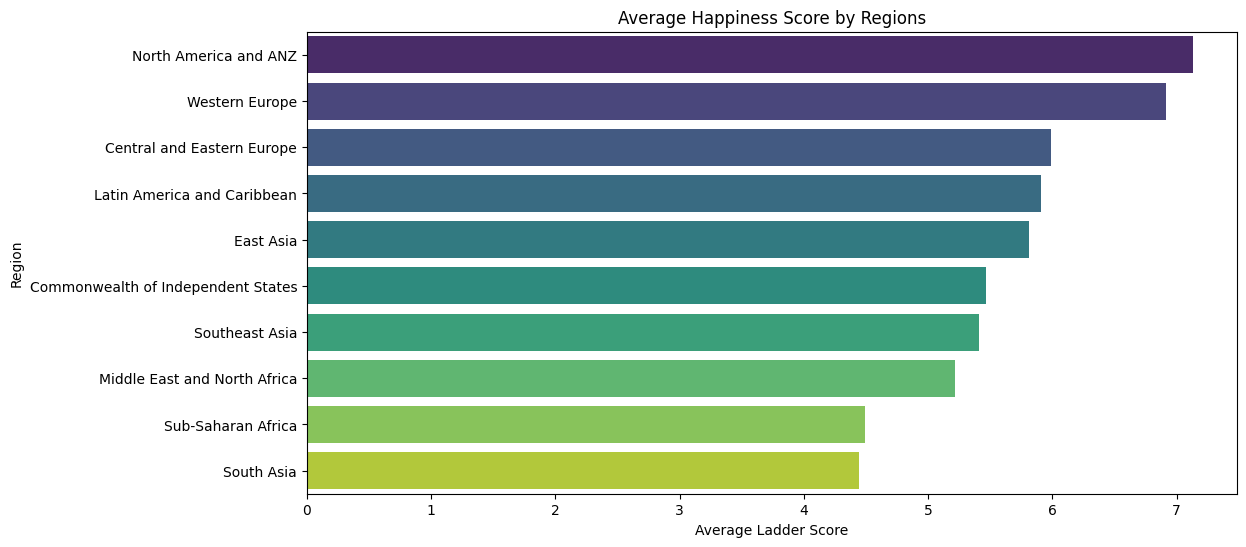

In [205]:
# Creiamo un grafico per migliorare la visualizzazione di questi dati e renderla più chiara e diretta.
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_happiness, y=regional_happiness.index, palette='viridis')
plt.title('Average Happiness Score by Regions')
plt.xlabel('Average Ladder Score')
plt.ylabel('Region')

Nell'opinione pubblica c'è un luogo comune che i paesi più ricchi portino le persone allo stremo e che una forte industrializzazione porti a una minore felicità nei cittadini, oltre che decine di migliaia di casi di depressione ed altre malattie mentali. Questo grafico, tuttavia, ci dimostra il contrario, evidenziando come i paesi più ricchi siano comunque più felici rispetto ai paesi più poveri. Maggiori malattie mentali sono diagnosticate nei paesi più ricchi probabilmente a causa di una maggiore educazione riguardo alla salute mentale e a infrastrutture mediche che possono permetterne la cura. Per provare ancora meglio il nostro punto, creiamo un altro grafico che mostri il PIL Pro Capite ordinato per regione mondiale.

In [206]:
# Raggruppiamo i nostri dati per regione e ordiniamoli in b ase al PIL pro capite (GDP per capita).
regional_gdp_per_capita = df.groupby('Regional indicator')['Logged GDP per capita'].mean().sort_values(ascending=False)

C:\Users\Ezechiele\AppData\Local\Temp\ipykernel_15624\4290184818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_gdp_per_capita.values, y=regional_gdp_per_capita.index, palette='viridis')


Text(0, 0.5, 'World Region')

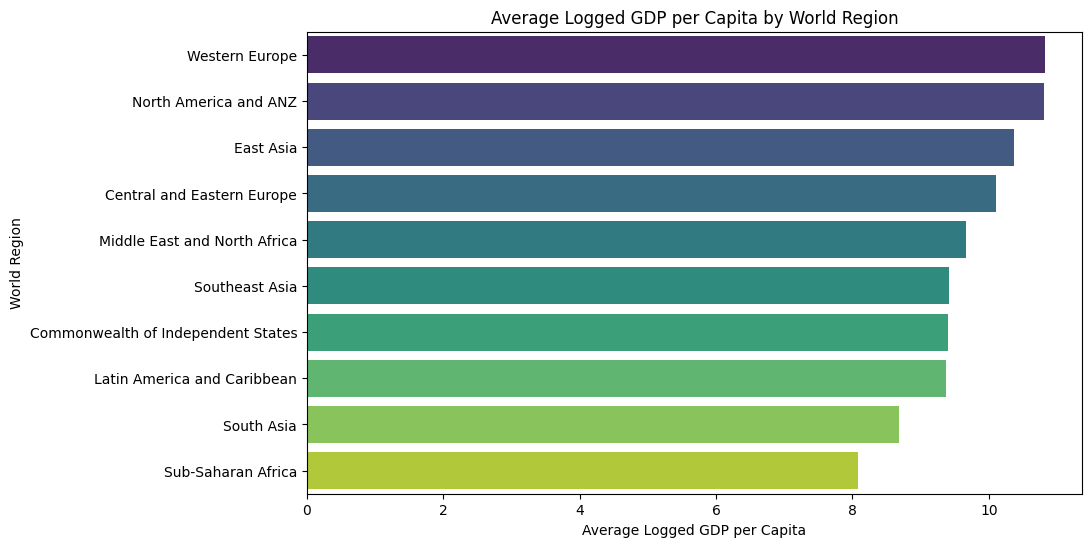

In [207]:
# Creiamo il nostro grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_gdp_per_capita.values, y=regional_gdp_per_capita.index, palette='viridis')
plt.title('Average Logged GDP per Capita by World Region')
plt.xlabel('Average Logged GDP per Capita')
plt.ylabel('World Region')

**Western Europe, North America and New Zealand** still have the first places in the ladder. But we have another interesting thing here: some countries that have higher GDP per Capita are still less happy than countries with lower GDP per Capita. (**Eastern Europe** was third in the happiness rank despite having lower GDP per Capita than **East Asia**.). **Latin America** is a great example: despite being 8th in this ladder, it is the 4th region in the happiness by region ladder.

## Correlation matrix

In [208]:
# Creiamo una matrice di correlazione per vedere le correlazione tra le variabili nel nostro dataframe
temp_df = df.drop(['Country name', 'Regional indicator'], axis=1) # Creo un nuovo dataframe temporaneo droppando tutti i valori non numerici
corr_matrix = temp_df.corr()
corr_matrix

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470787,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,0.492010
Standard error of ladder score,-0.470787,1.000000,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,0.136827
Logged GDP per capita,0.789760,-0.645799,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,-0.041119
Social support,0.756888,-0.530815,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,0.006681
Healthy life expectancy,0.768099,-0.583805,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,-0.023433
Freedom to make life choices,0.607753,-0.275182,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,0.100242
Generosity,-0.017799,0.138349,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,-0.027212
Perceptions of corruption,-0.421140,0.276997,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,0.004478
Dystopia + residual,0.492010,0.136827,-0.041119,0.006681,-0.023433,0.100242,-0.027212,0.004478,1.000000


<Axes: >

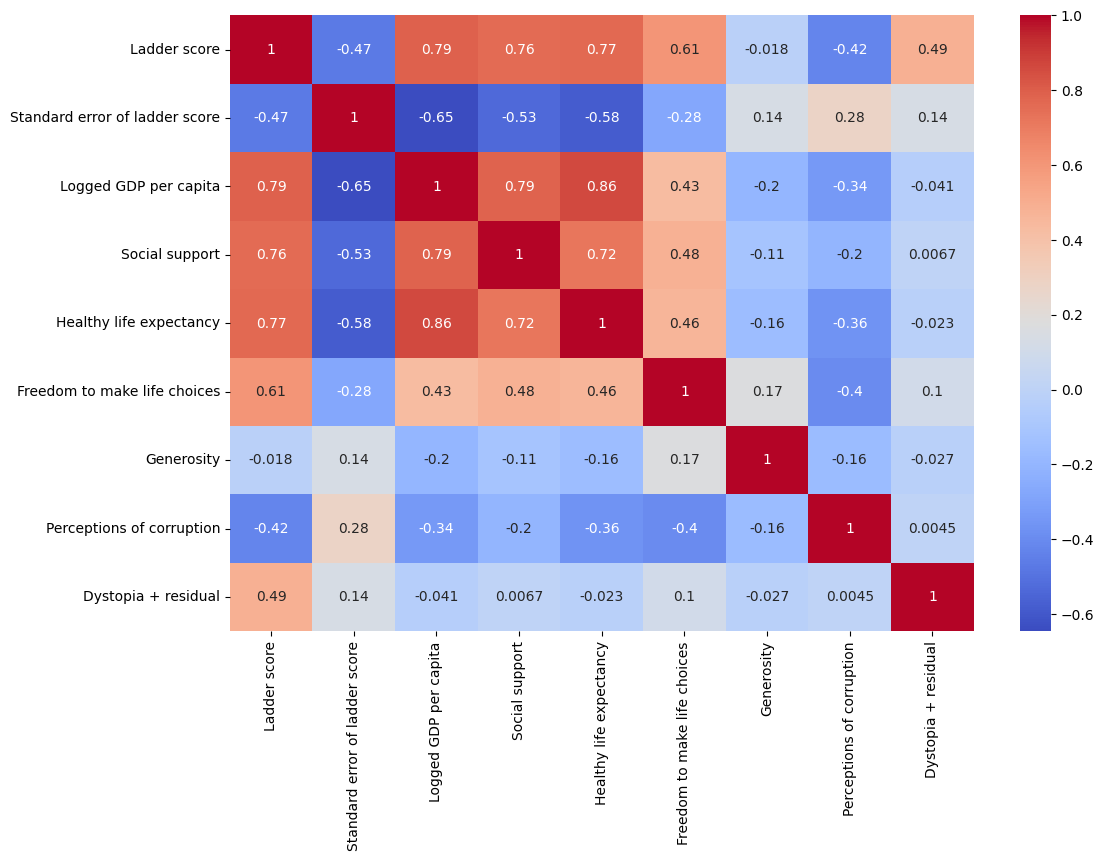

In [209]:
# Creo una heatmap con seaborn basandoci sulla matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Fattori come **GDP per capita**, **social support**, e **healthy life expectancy** mostrano una forte correlazione con il Ladder score, sottolineando quindi il loro impatto sulla felicità di una nazione. Il **PIL Pro Capite** è il fattore che maggiormente influenza la felicità di una nazione.

**Perception of corruption (percezione della corruzione)** ha una correlazione negativa con il **Ladder score**, anche se influisce comunque meno delle variabili citate prima.

**Freedom to make life choices** è un'altra correlazione significante: i paesi democratici rendono i propri cittadini più felici. Ciò sottolinea l'importanza dell'autonomia personale e dei diritti civili nel benessere di un cittadino.

Da questa matrice di correlazione possiamo capire che le variabili principali per rendere un paese felice sono: **alto PIL pro capite, un buon sistema di welfare e supporto sociale, e una lunga aspettativa di vita.**

## Linear Model

Trainiamo un modello a regressione lineare usando i **Dati Oggettivi** come variabile indipendente, e la ladder score come variabile dipendente. Vedremo se i dati oggettivi sono in grado di riflettere da soli la posizione in classifica dei vari paesi attraverso le predizioni del modello.

In [210]:
# Let's import LinearRegression class from sklearn to handle the training on a high level
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [211]:
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Perceptions of corruption', 'Freedom to make life choices']]  # Independent variables
y = df['Ladder score']  # Dependent variable

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Istanziamo la classe LinearRegression da sklearn
reg = LinearRegression()
# Questo metodo allena il modello a regressione lineare attraverso i nostri dati
reg.fit(X_train, y_train)

LinearRegression()

In [214]:
# Il nostro modello ha raggiunto un valore di R-quadro pari a 0.60. Il 60% della variabilità nei punteggi riguardanti la felicità delle singole nazioni possono essere spiegati attraverso
# le variazioni delle variabili indipendenti.
# 0.60 è uno score decente.
reg.score(X_test, y_test)

0.6036362649933691

In [215]:
# reg.predict() avvia le predizioni del nostro modello sui dati.
predictions = reg.predict(X_test)

In [216]:
# Creiamo un nuovo dataframe che contiene le predizioni del nostro modello.
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
test_df['Country name'] = df.loc[test_df.index, 'Country name']

Il nostro modello può predire con abbastanza precisione il punteggio di ogni paese, che si avvicina di molto al punteggio reale. Visualizziamo il nostro dataframe con le predizioni per aiutarci a capire meglio.

In [217]:
# Come campione, useremo 10 paesi casuali.
sample_countries = test_df.sample(10)

In [218]:
# Creiamo un grafico dove compariamo i punteggi della classifica originale con i punteggi predetti dal modello.
plt.figure(figsize=(12, 6))
indices = np.arange(len(sample_countries))

<Figure size 1200x600 with 0 Axes>

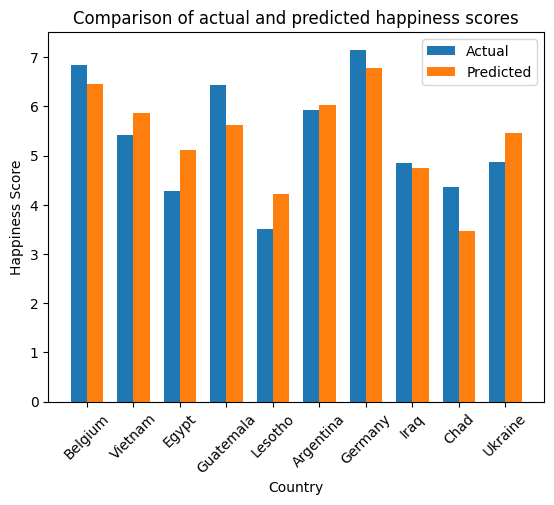

In [219]:
plt.bar(indices - 0.35/2, sample_countries['Actual'], 0.35, label='Actual')
plt.bar(indices + 0.35/2, sample_countries['Predicted'], 0.35, label='Predicted')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Comparison of actual and predicted happiness scores')
plt.xticks(indices, sample_countries['Country name'], rotation=45)
plt.legend()

Le predizioni del nostro modello sono piuttosto vicine ai punteggi reali. Possiamo dedurre che le variabili **GDP per capita, Social support, Healthy life expectancy, Perceptions of corruption, Freedom to make life choices** influenzano del **60%** la felicità di un paese.

Il restante 25% può essere attribuito ad altre variabili come cultura, condizioni del territorio della nazione, e altri fattori socio-politici. 

# Conclusioni

Le chiavi che rendono un paese felice sono per lo più legate al benessere sociale, alla libertà e alla ricchezza, rendendo automaticamente i paesi democratici occidentali i più felici. Le caratteristiche di un tipico paese occidentale spesso costituiscono fino al 60% della felicità di un paese; il restante 40% è definito da altri fattori come la cultura, l'ambiente del paese...

Abbiamo anche scoperto che alcuni paesi sfidano queste previsioni, come l'**America Latina**, che è più felice ma più povera rispetto ai suoi pari nella classifica. Abbiamo avuto anche alcune sorprese, come il **Kirghizistan** che si rivela essere un paese più felice di **Hong Kong**, nonostante la mancanza di prosperità economica, una lunga aspettativa di vita e un buon sistema di welfare. La spiegazione per queste eccezioni può essere attribuita alla cultura di un paese, alla visione soggettiva della felicità e così via; ecco perché questo dataset è influenzato principalmente da sondaggi.

Abbiamo comunque potuto vedere che i dati oggettivi analizzati erano una parte importante del benessere di un paese. Un paese, oggettivamente parlando, è decisamente più felice se i suoi cittadini:
- Godono di uno status economico robusto, che permette stabilità e opportunità.
- Hanno accesso a reti di supporto sociale complete, garantendo un senso di comunità e appartenenza.
- Beneficiano di una lunga e sana aspettativa di vita.

# Credits

- Ezechiele Spina - [zeke-code](https://github.com/zeke-code)